In [271]:
#João Farias - nmec: 124964
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import math
f = np.array([1.2,4.2,11,20,22,37,45])
mass = np.array([0.03, 0.54, 9.1, 38, 57, 230, 480])

In [272]:
def linreg(x,y):
    N = len(x)
    #sums of all elements, and sum of x**2 and y**2
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumxy = np.sum(x*y)
    sumxx = np.sum(np.square(x))
    sumyy = np.sum(np.square(y))
    #formulas
    m = ((N*sumxy)-(sumx*sumy))/((N*sumxx)-sumx**2)
    b = (sumxx*sumy-sumx*sumxy)/(N*sumxx-sumx**2)
    r2 = ((N*sumxy - sumx*sumy)**2)/((N*sumxx-sumx**2)*(N*sumyy-sumy**2))
    deltam = abs(m)*math.sqrt(((1/(r2**2))-1)/(N-2))
    deltab = deltam * math.sqrt((sumxx)/N)
    return m, b, r2, deltam, deltab

Text(42.722222222222214, 0.5, 'Massa (kg)')

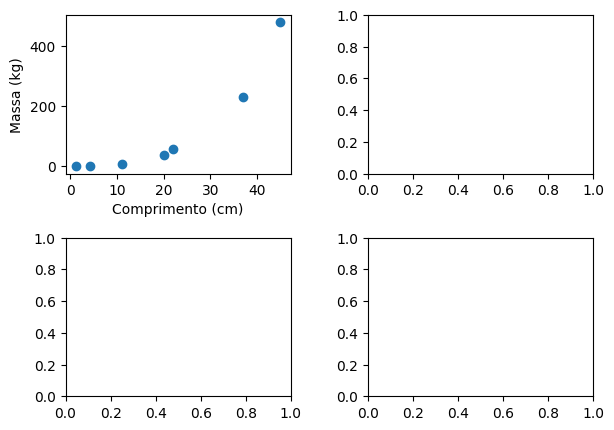

In [273]:
figure, axis = plt.subplots(2,2)
figure.tight_layout(pad=2.5)
axis[0,0].scatter(f, mass)
axis[0,0].set_xlabel("Comprimento (cm)")
axis[0,0].set_ylabel("Massa (kg)")

In [274]:
m, b, r2, deltam, deltab = linreg(f, mass)
m, b, r2, deltam, deltab
# A) O coeficiente de determinação r**2 = 0.8151276625448709 , pelo que o ajuste é mau.

(9.916282636610074,
 -82.51086888286488,
 0.8151276625448709,
 3.151576232306773,
 79.17636955869452)

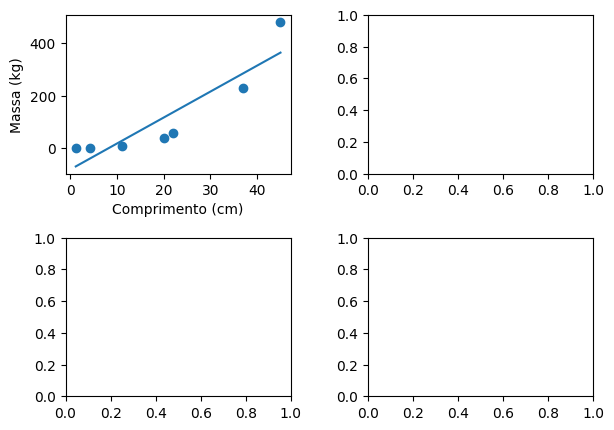

In [275]:
axis[0,0].plot(f, m*f+b, linestyle="-")
figure

0.19329499827571386 -1.3943692201064488 0.8351081253935738 0.05694077339749791 1.4305107619682462


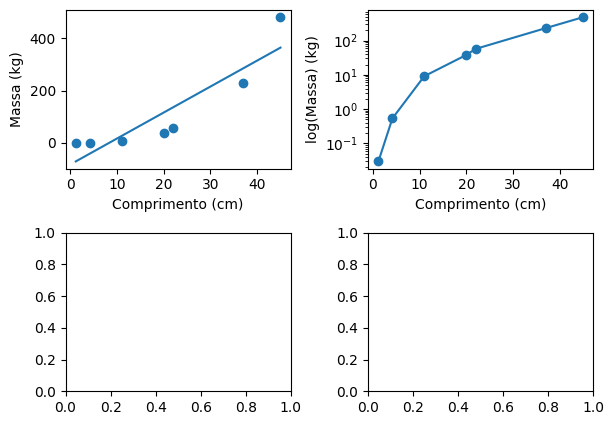

In [276]:
axis[0,1].semilogy(f, mass, marker="o")
axis[0,1].set_xlabel("Comprimento (cm)")
axis[0,1].set_ylabel("log(Massa) (kg)")
m_logy, b_logy, r2_logy, deltam_logy, deltab_logy = linreg(f, np.log(mass))
print(m_logy, b_logy, r2_logy, deltam_logy, deltab_logy)
#No caso da função dada pela regressão linear do comprimento do fémur pelo logaritmo da massa, o declive é 0.19329499827571386 +/-0.05694077339749791
#e o seu coeficiente de determinação é 0.8351081253935738.
figure

2.6669805798913058 -4.192364341797967 0.9975694092514619 0.08331027879052683 0.23117872882970528


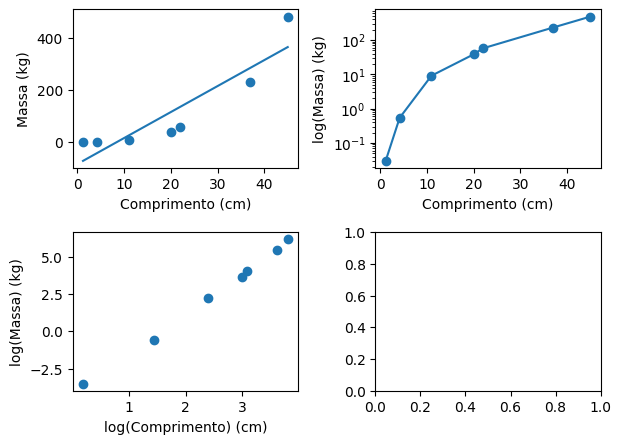

In [277]:
axis[1,0].scatter(np.log(f), np.log(mass))
axis[1,0].set_xlabel("log(Comprimento) (cm)")
axis[1,0].set_ylabel("log(Massa) (kg)")
m_log2, b_log2, r2_log2, deltam_log2, deltab_log2 = linreg(np.log(f), np.log(mass))
print(m_log2, b_log2, r2_log2, deltam_log2, deltab_log2)
#No caso da função dada pela regressão linear do logaritmo do comprimento do fémur pelo logaritmo da massa, o declive é 2.6669805798913058+/-0.08331027879052683
#e o seu coeficiente de determinação é 0.9975694092514619.
figure

In [278]:
#Sendo que o coeficiente de determinação da regressão linear do logaritmo do comprimento do fémur pelo logaritmo da massa é a mais próxima e é, de facto,
#um ajuste excelente(0.998), podemos concluir que a relação que melhor se enquadra é uma relação de potência.

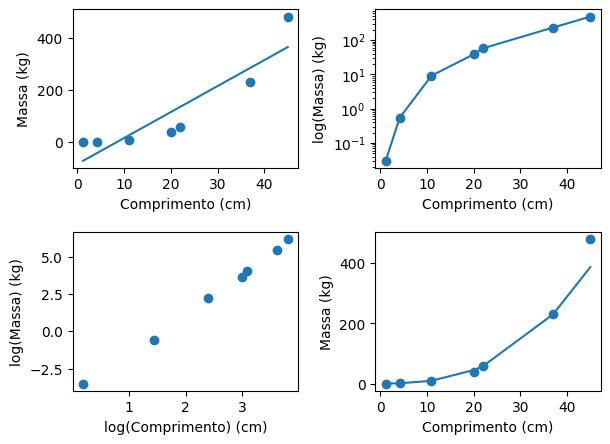

In [279]:
axis[1,1].scatter(f, mass)
axis[1,1].plot(f, np.exp(b_log2)*f**m_log2)
axis[1,1].set_xlabel("Comprimento (cm)")
axis[1,1].set_ylabel("Massa (kg)")
figure
#Verificamos que a relação é de potência e a sua equação é m(f) = c * f**m, em que c e m são valores de R. 